In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def non_nan(df):
    return [(df.index[row], df.columns[col]) for row in range(df.shape[0]) for col in range(df.iloc[row,:].shape[0]) if not np.isnan(df.iloc[row, col])]

def get_decade(year):
    return str(year)[:3]

In [3]:
continent_df = pd.read_csv("./countryContinent.csv", encoding="latin-1")
female_ed_df = pd.read_csv("./literacy_rate_adult_female_percent_of_females_ages_15_above.csv")
male_ed_df = pd.read_csv("./literacy_rate_adult_male_percent_of_males_ages_15_above.csv")
population_df = pd.read_csv("population-since-1800.csv")
female_pop_df = pd.read_csv("share-population-female.csv")


In [4]:
#female_pop_df

In [5]:
female_ed_df = female_ed_df.set_index("country")
male_ed_df = male_ed_df.set_index("country")

female = non_nan(female_ed_df)
male = non_nan(male_ed_df)

female.remove(("Afghanistan", "2010"))

In [6]:
#female_ed_df

In [7]:
new_pop_df_f = pd.DataFrame(np.zeros(female_ed_df.shape), columns = female_ed_df.columns, index = female_ed_df.index)
new_pop_df_m = pd.DataFrame(np.zeros(male_ed_df.shape), columns = male_ed_df.columns, index = male_ed_df.index)


In [8]:
for c in range(len(female_ed_df.columns)):
    for r in range(len(female_ed_df)):
        row = list(female_ed_df.index)[r]
        col = list(female_ed_df.columns)[c]
        #print(type(row), type(col))
        pop = population_df[(population_df.Entity == row) & (population_df.Year == int(col))]
        prop = female_pop_df[(female_pop_df.Entity == row) & (female_pop_df.Year == int(col))]
        #print(len(pop), len(prop))
        if len(pop) == 1 and len(prop) == 1:
            new_pop_df_f.iloc[r, c] = pop.iloc[0, 3] * (prop.iloc[0, 3]/100)
            
for c in range(len(male_ed_df.columns)):
    for r in range(len(male_ed_df)):
        row = list(male_ed_df.index)[r]
        col = list(male_ed_df.columns)[c]
        pop = population_df[(population_df.Entity == row) & (population_df.Year == int(col))]
        prop = female_pop_df[(female_pop_df.Entity == row) & (female_pop_df.Year == int(col))]
        if len(pop) == 1 and len(prop) == 1:
            new_pop_df_m.iloc[r, c] = pop.iloc[0, 3] * (1-(prop.iloc[0, 3]/100))

In [9]:
#new_pop_df_m

In [10]:
# for l in range(len(female_pop_df)):
#     col = female_pop_df.iloc[l, 2]
#     row = female_pop_df.iloc[l, 0]
    
# #     if get_decade(col) in list(map(get_decade, list(population_df["Year"]))):
# #         population = 
#     filtered_df = population_df[(population_df.Year == col) & (population_df.Entity == row)]
#     if len(filtered_df) >= 1:
#         assert len(filtered_df) == 1
#         pop = filtered_df.iloc[0, 3]

#         print(col, row)

#         if str(col) in female_ed_df.columns and row in female_ed_df.index:
#             percent = (female_pop_df.iloc[l, 3]/100)
#             temp0 = female_ed_df[str(col)][row]
#             if not np.isnan(temp0):
#                 female_ed_df[str(col)][row] = temp0 
#                 key = str(col) + "_pop"
#                 if not key in female_ed_df.columns:
#                     new_vals = np.zeros(len(female_ed_df))
#                     index = list(female_ed_df.index).index(row)
#                     new_vals[index] = round(percent * pop, 2)
#                     female_ed_df[key] = new_vals
#                 else:
#                     female_ed_df[key][row] = round(percent * pop, 2)

#         if str(col) in male_ed_df.columns and row in male_ed_df.index:
#             percent = 1 - (female_pop_df.iloc[l, 3]/100)
#             temp1 = male_ed_df[str(col)][row]
#             if not np.isnan(temp1):
#                 male_ed_df[str(col)][row] = temp1
#                 key = str(col) + "_pop"
#                 if not key in male_ed_df.columns:
#                     new_vals = np.zeros(len(male_ed_df))
#                     index = list(male_ed_df.index).index(row)
#                     new_vals[index] = round(percent * pop, 2)
#                     male_ed_df[key] = new_vals
#                 else:
#                     male_ed_df[key][row] = round(percent * pop, 2)

female_ed_df = female_ed_df.merge(new_pop_df_f, left_index = True, right_index = True, suffixes = ("_lit", "_pop"))
male_ed_df = male_ed_df.merge(new_pop_df_m, left_index = True, right_index = True, suffixes = ("_lit", "_pop"))

In [11]:
#male_ed_df

In [12]:
female_ed_df = female_ed_df.merge(continent_df, left_index = True, right_on = "country", how = "left")
male_ed_df = male_ed_df.merge(continent_df, left_index = True, right_on = "country", how = "left")

In [13]:
#print(female_ed_df)

In [14]:
female_ed_df = female_ed_df.set_index("country")
male_ed_df = male_ed_df.set_index("country")
female_ed_df = female_ed_df.drop(['code_2', 'code_3', 'country_code', 'iso_3166_2', 'sub_region_code', 'region_code'], axis = 1)
male_ed_df = male_ed_df.drop(['code_2', 'code_3', 'country_code', 'iso_3166_2', 'sub_region_code', 'region_code'], axis = 1)

In [15]:
#female_ed_df

In [16]:
for i in range(len(female_ed_df)):
    #print(female_ed_df.iloc[i,37])
    if not isinstance(female_ed_df.iloc[i,37], str):
        female_ed_df.iloc[i,37] = "Other"
    if not isinstance(male_ed_df.iloc[i,37], str):
        male_ed_df.iloc[i,37] = "Other"

female_df_sub = female_ed_df.groupby("sub_region").mean()
male_df_sub = male_ed_df.groupby("sub_region").mean()

In [17]:
#female_df_sub

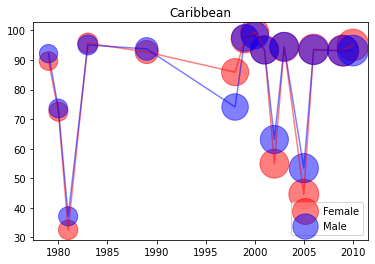

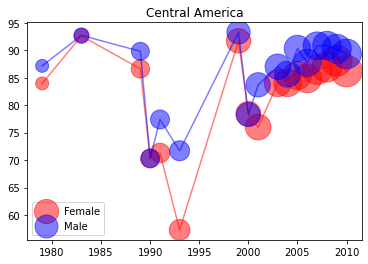

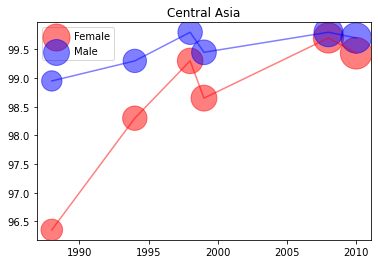

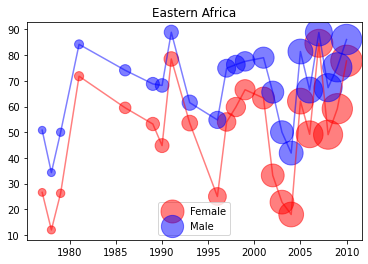

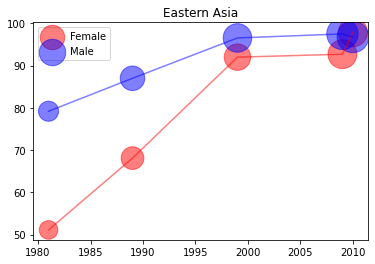

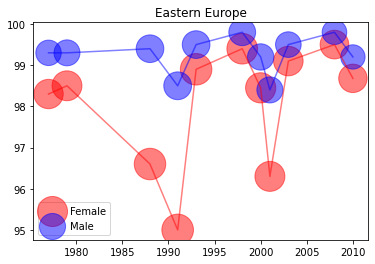

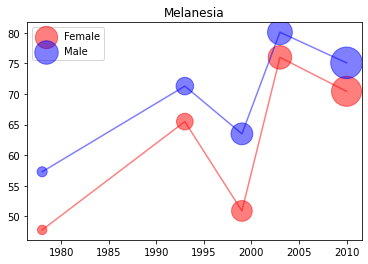

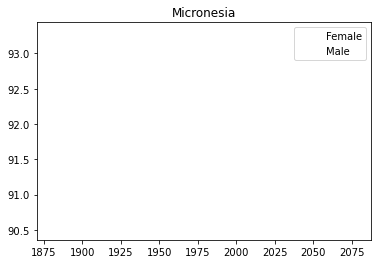

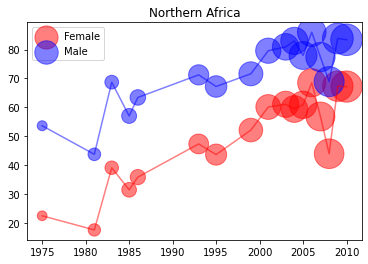

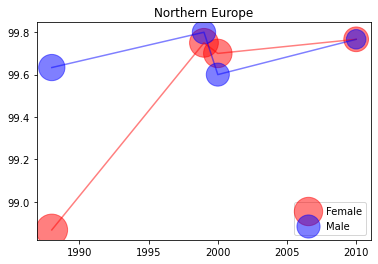

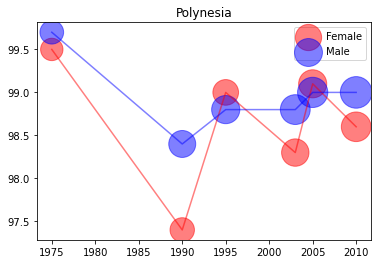

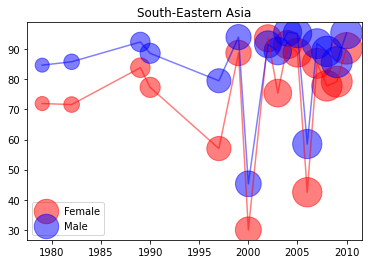

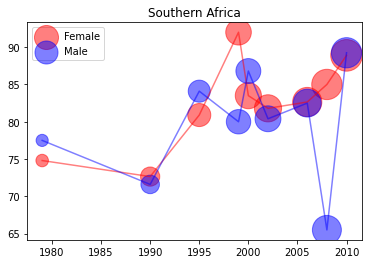

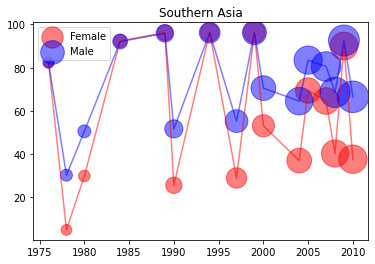

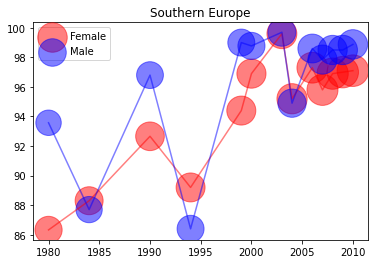

In [18]:
# =============================================================================
# for j in range(len(female_ed_df)):
#     
#     new_df0 = female_ed_df.iloc[j,:37]
#     new_df0 = new_df0[new_df0.isnull()==False]
#     new_df1 = male_ed_df.iloc[j,:37]
#     new_df1 = new_df1[new_df1.isnull()==False]
#     
#     years_female = list(pd.Series(new_df0.index).apply(int))
#     literacy_female = list(new_df0)
#     years_male = list(pd.Series(new_df1.index).apply(int))
#     literacy_male = list(new_df1)
#     plt.figure(j)
#     
#     plt.plot(years_female, literacy_female, c="red", label = "Female")
#     plt.plot(years_male, literacy_male, c="blue", label = "Male")
#     plt.legend()
#     plt.title(female_ed_df.index[j])
# =============================================================================
func1 = lambda x: x.split("_")[0] + "_pop"
func2 = lambda x: x/1000 if not np.isnan(x) else x
for j in range(len(female_df_sub)):
    
    new_df0 = female_df_sub.iloc[j, :37]
    new_df0 = new_df0[new_df0.isnull()==False]
    new_df01 = female_df_sub.iloc[j, 37:74].get(list(map(func1, list(new_df0.index))))
    #print(new_df01)
    
    new_df1 = male_df_sub.iloc[j, :37]
    new_df1 = new_df1[new_df1.isnull()==False]
    new_df11 = male_df_sub.iloc[j, 37:74].get(list(map(func1, list(new_df1.index))))
    #print(new_df11)
    
    
    if isinstance(new_df01, pd.Series) and isinstance(new_df11, pd.Series):
        mx = max([max(new_df11), max(new_df01)])
        new_df01 = (10*(new_df01/mx))**3
        new_df11 = (10*(new_df11/mx))**3
    
    #print(new_df01)
    #print(new_df11)
    
    years_female = list(pd.Series(new_df0.index).apply(lambda x: int(x.split("_")[0])))
    literacy_female = list(new_df0)
    years_male = list(pd.Series(new_df1.index).apply(lambda x: int(x.split("_")[0])))
    literacy_male = list(new_df1)
    
    #print(len(years_female), len(list(new_df01)))
    if isinstance(new_df11, pd.Series) and isinstance(new_df01, pd.Series):
        plt.figure(j)
    
        plt.scatter(years_female, literacy_female, s = list(new_df01), c="red", label = "Female", alpha = 0.5)
        plt.scatter(years_male, literacy_male, s = list(new_df11), c="blue", label = "Male", alpha = 0.5)
        plt.plot(years_female, literacy_female, c="red", alpha = 0.5)
        plt.plot(years_male, literacy_male, c="blue", alpha = 0.5)
    #plt.xticks(rotation=-90)
        plt.legend()
        plt.title(female_df_sub.index[j])

In [19]:
#new_df0

In [20]:
#female_pop_df